#                                                             Lab 2 
##                                                   Yash Kothari | 160123044

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [100]:
a = pd.read_csv("d-csp0108.txt",sep=r'\s+')

In [85]:
a.head()

,Date,C,SP
0,20010102,-0.011016,-0.028032
1,20010103,0.087871,0.050099
2,20010104,0.013652,-0.010552
3,20010105,-0.035915,-0.026242
4,20010108,-0.005821,-0.001918


## Ques 1 : Scatter Plots

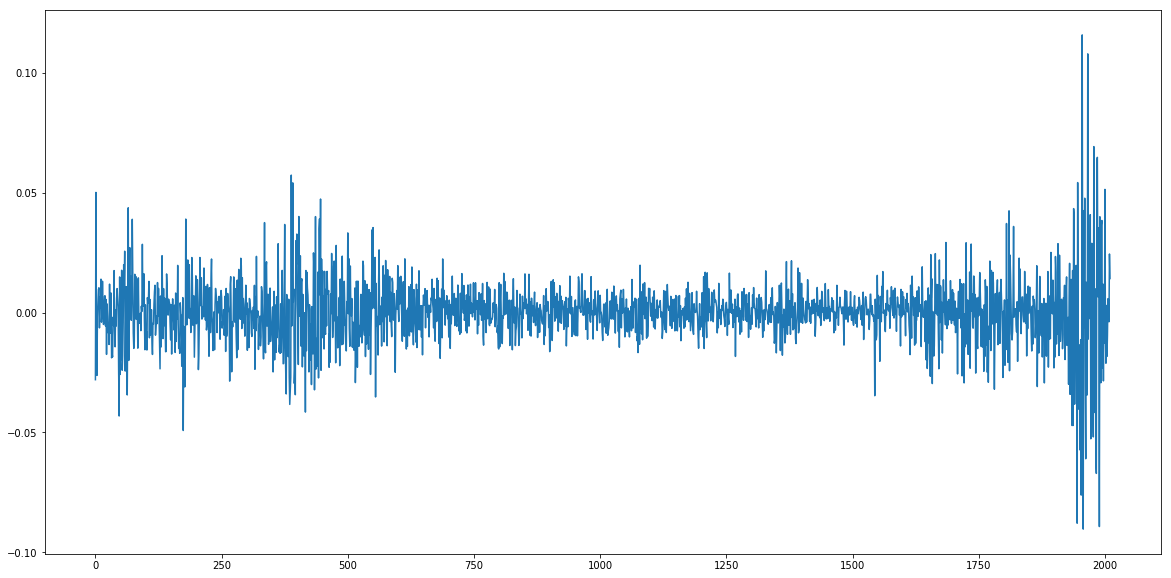

In [92]:
plt.plot(a['SP'])

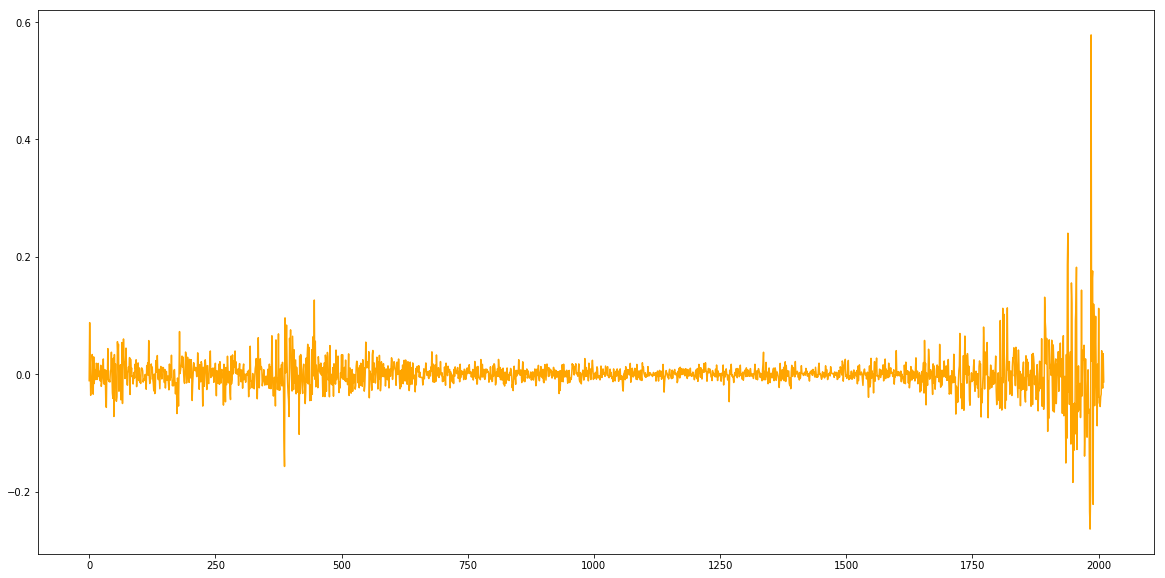

In [90]:
plt.plot(a['C'],color="orange")

## Ques 2 : Histograms and comparisons with different distributions

In [101]:
def ploty(x,name):
    p=0.5
    mu = np.mean(x)
    sigma = np.std(x)
    lclip = mu - 3*sigma
    rclip = mu + 3*sigma
    _ = plt.hist(x,density = True,bins=100,range=(lclip,rclip))
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    
    plt.plot(x, stats.norm.pdf(x, mu, sigma),label="Normal Distribution")
    plt.plot(x,stats.t.pdf(x,1,scale = 0.4*sigma),label = "t Distribution")  
    plt.plot(x,stats.laplace.pdf(x,scale=0.6*sigma),label = "Laplace Distribution")
    plt.plot(x,stats.cauchy.pdf(x,scale=0.6*sigma),label = "Cauchy Distribution")
    plt.plot(x, p*stats.norm.pdf(x, mu, 0.6*sigma)+(1-p)*stats.norm.pdf(x, mu, 1.5*sigma),label = "Linear Combination of 2 Normal Distribution")
    plt.title(name)
    plt.legend(loc='upper left')

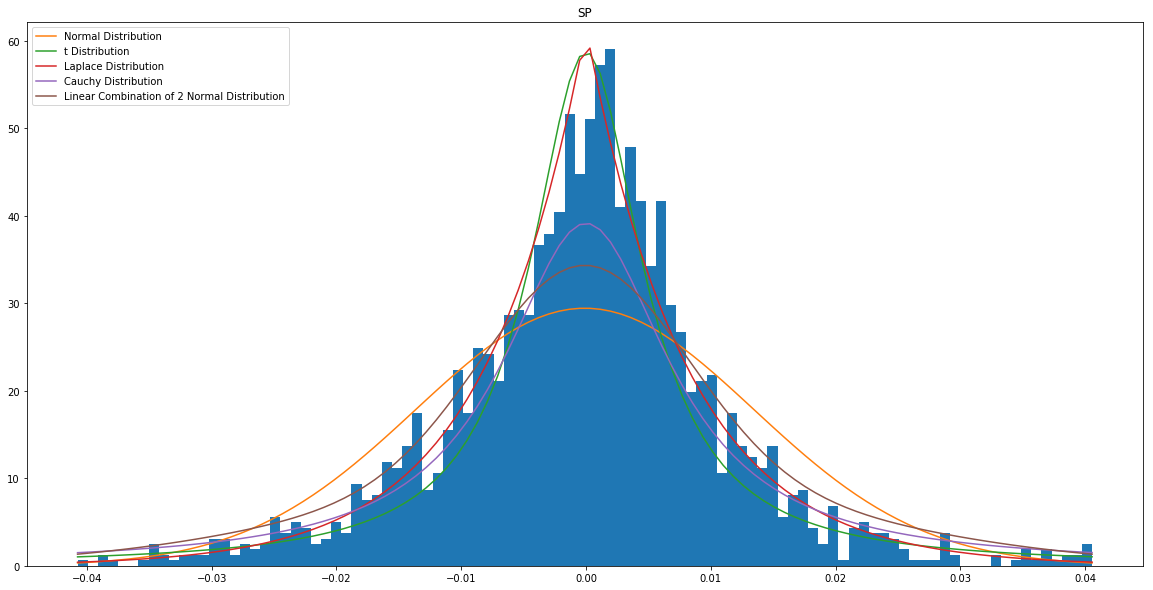

In [102]:
ploty(a['SP'],"SP")

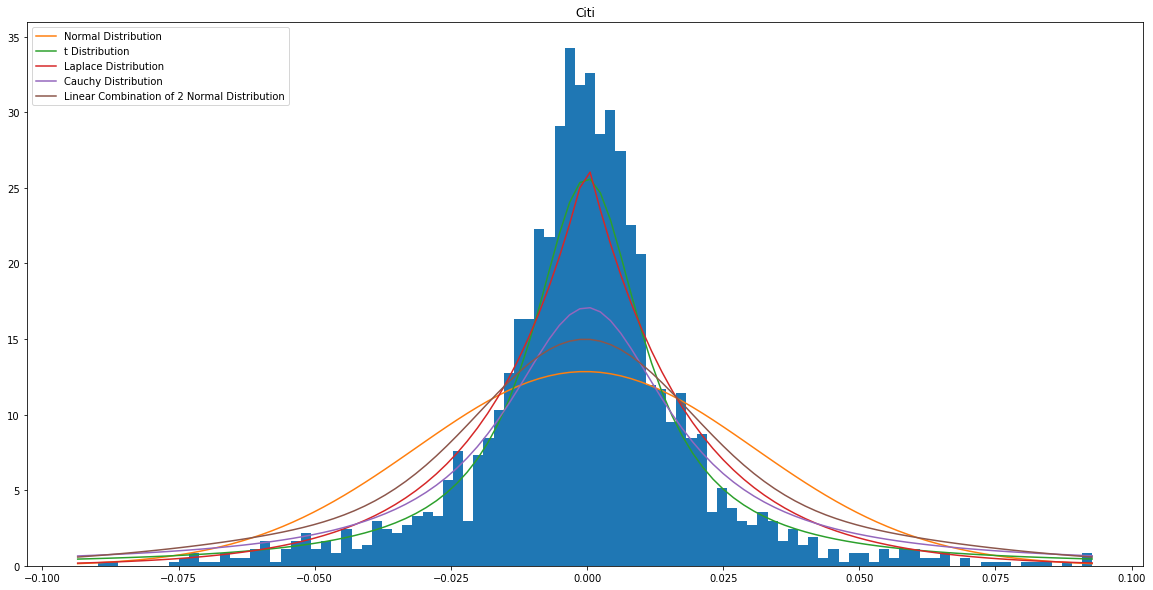

In [103]:
ploty(a['C'],"Citi")

## Ques 4: qqPlots

In [104]:
def qqplots(data):
    mu = np.mean(data)
    sigma = np.std(data)
    res = stats.probplot(data, dist=stats.t,sparams=(2.5,mu,sigma),plot=plt)
    plt.figure()
    res = stats.probplot(data, dist=stats.norm,sparams=(mu,sigma),plot=plt)
    plt.figure()
    res = stats.probplot(data, dist=stats.laplace,sparams=(mu,sigma),plot=plt)
    plt.figure()
    res = stats.probplot(data, dist=stats.cauchy,sparams=(mu,sigma),plot=plt)

### Following plots are in order T, Normal, Laplace, Cauchy

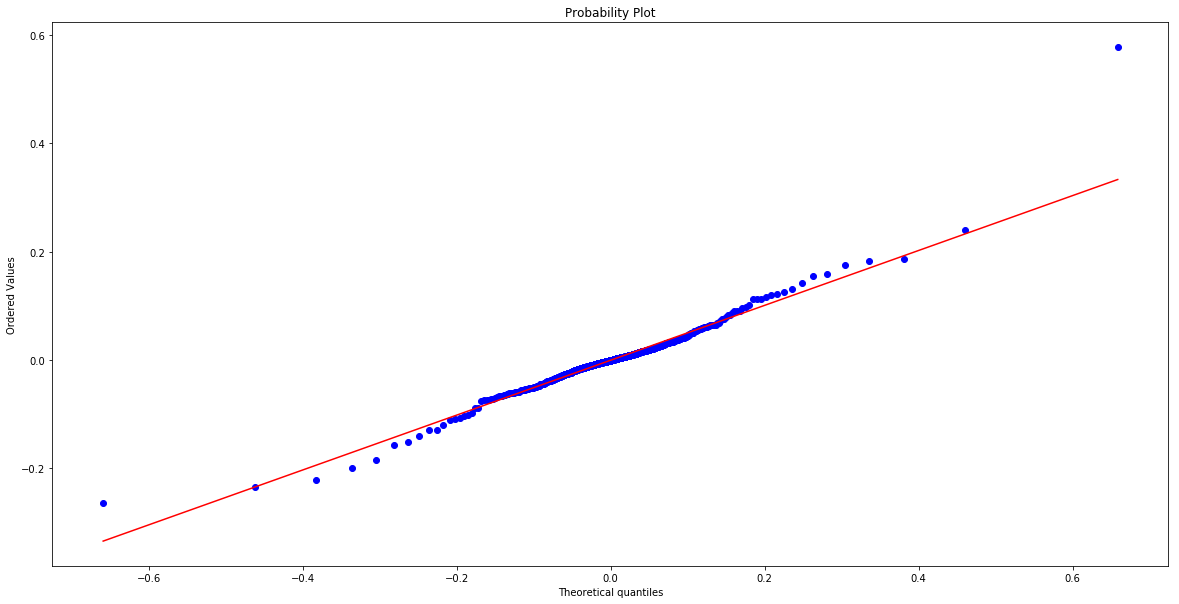

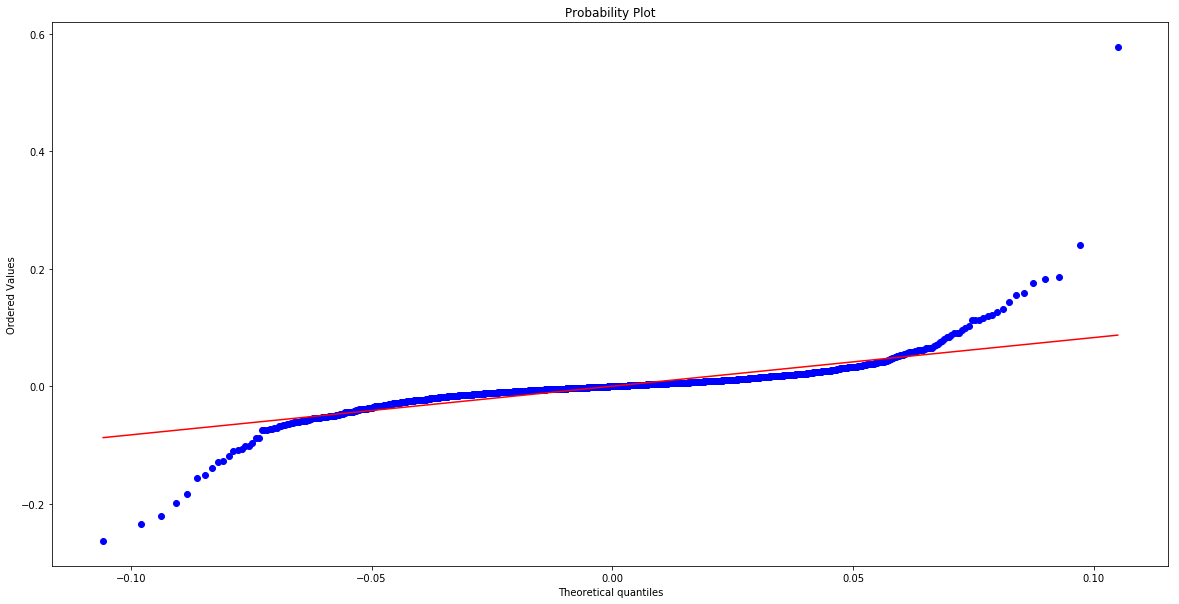

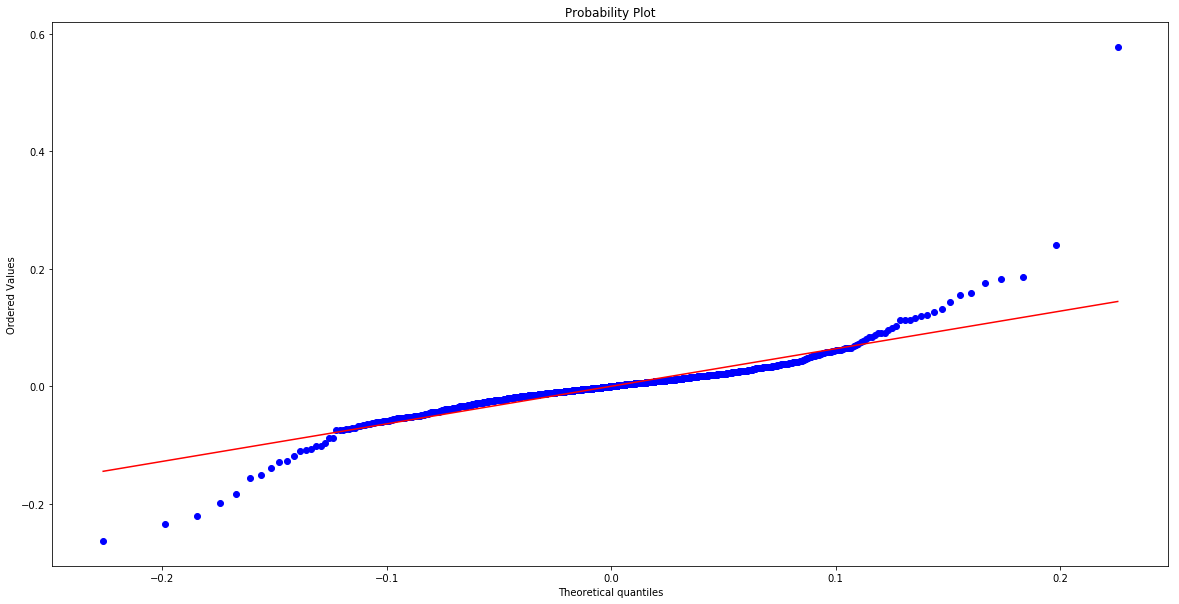

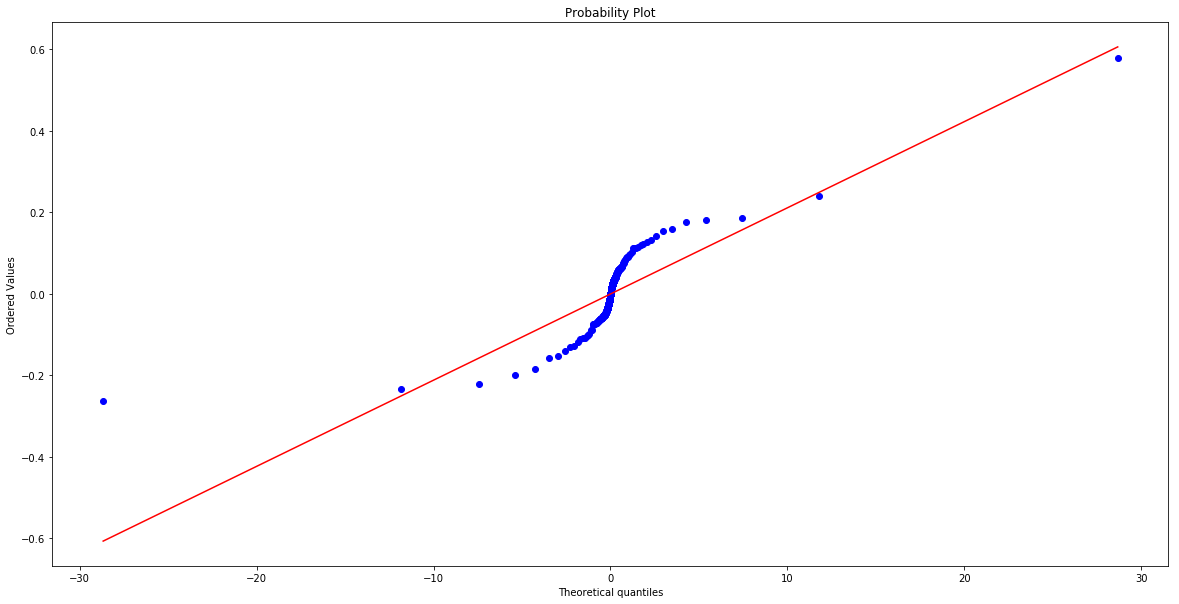

In [110]:
# Citi Bank data 
qqplots(a['C'])

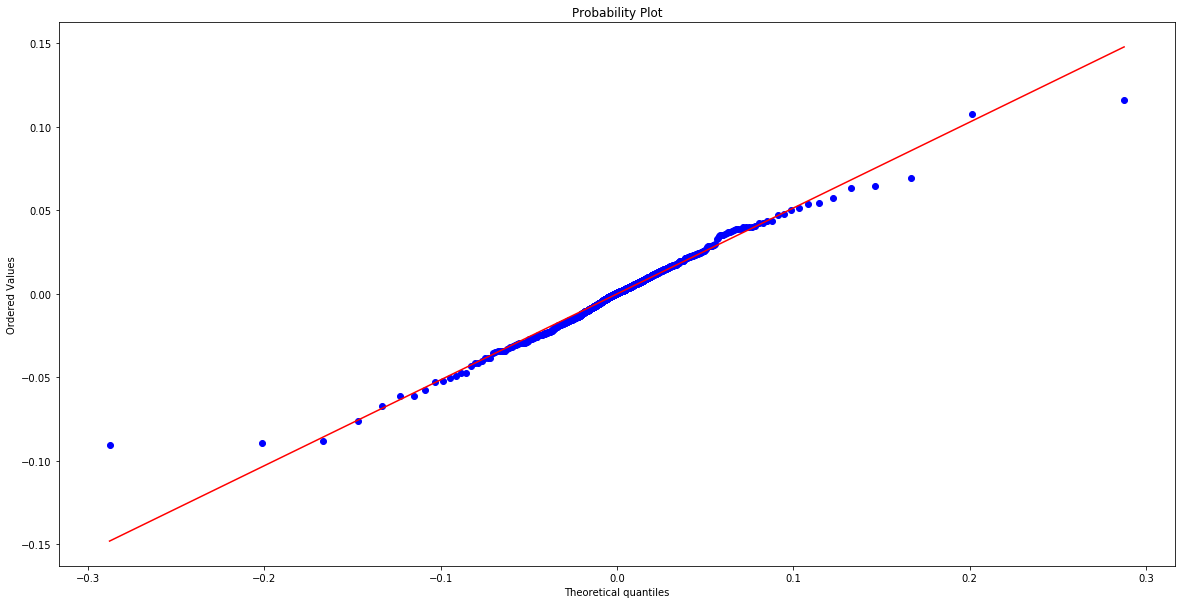

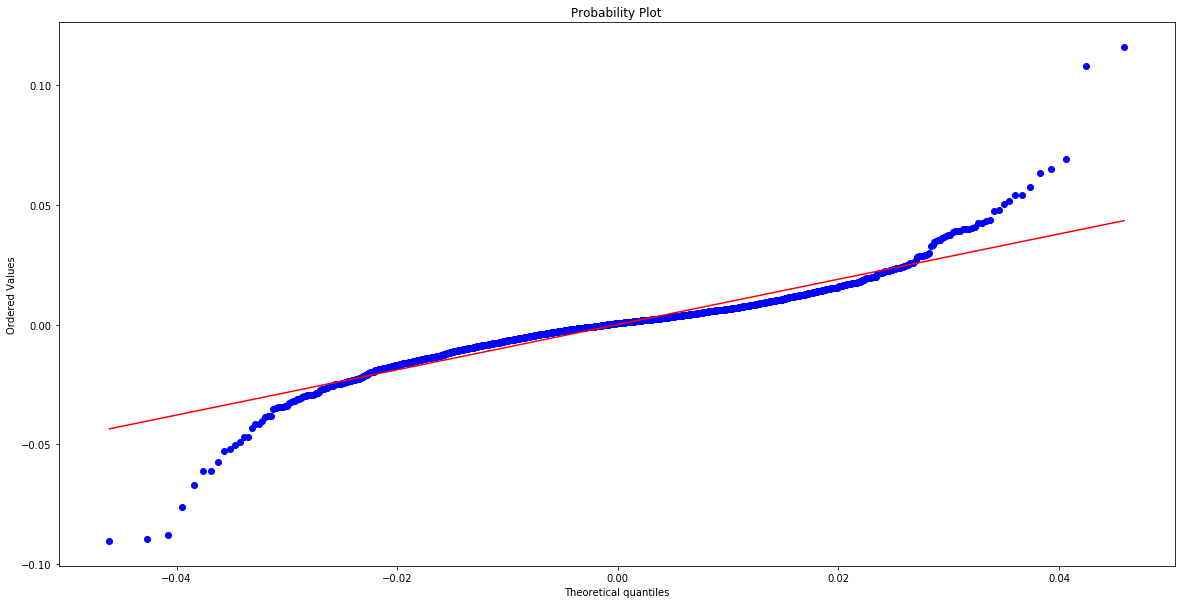

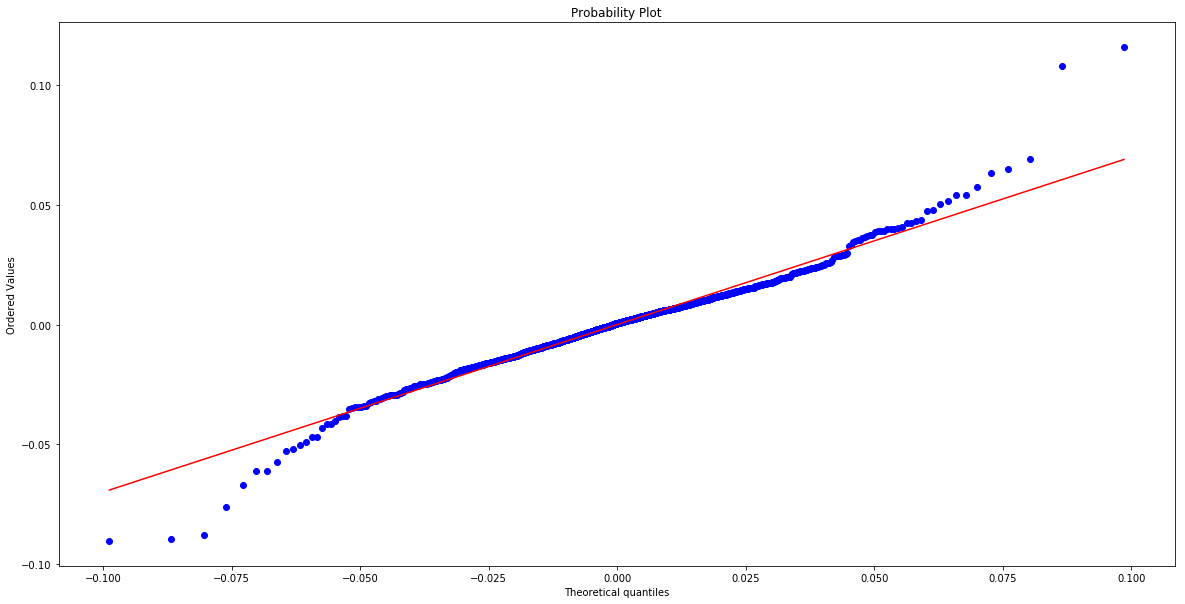

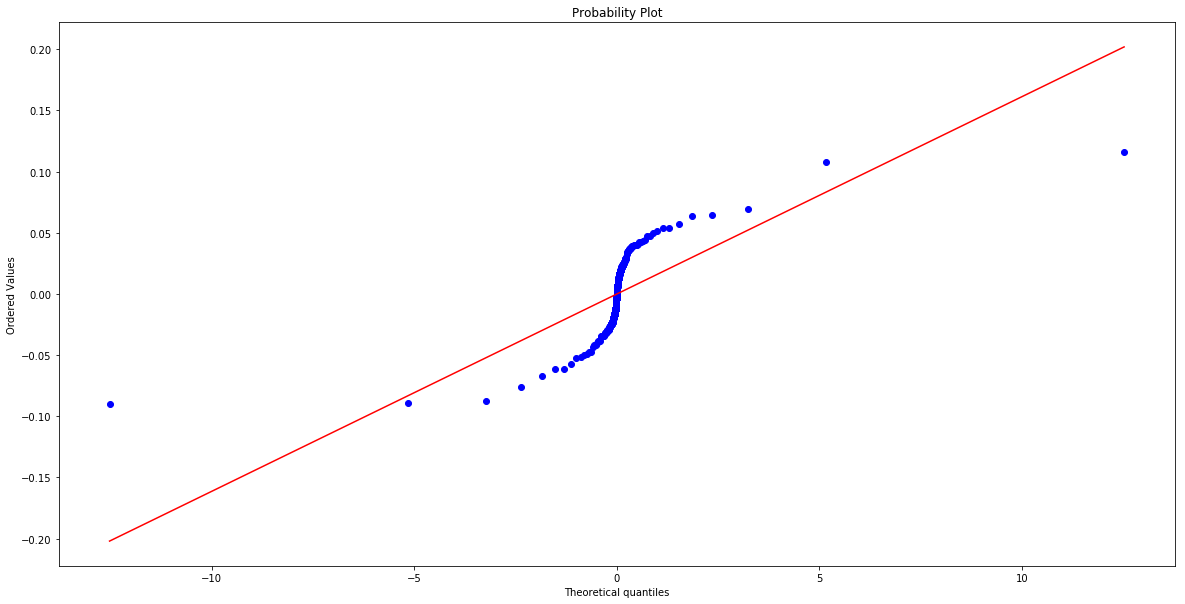

In [111]:
 # SP Index data
qqplots(a['SP'])

### t and data distrubtions are very similar
### Data Distribution have heavier tail than Normal and Laplace
### Cauchy have heavirier tail than Data Distribution

## Ques 5 : Survival Curve

In [106]:
def survivalPlots(data):
    plt.scatter(data, stats.norm.sf(data), label="Normal", marker='.');
    plt.scatter(data, stats.t.sf(data, df=10), label="T", marker='.');
    plt.scatter(data, stats.laplace.sf(data), label="Double Exponential", marker='.');
    plt.scatter(data, stats.cauchy.sf(data), label="Cauchy", marker='.');
    plt.legend();
    plt.title('Survival Plots')
    plt.plot();


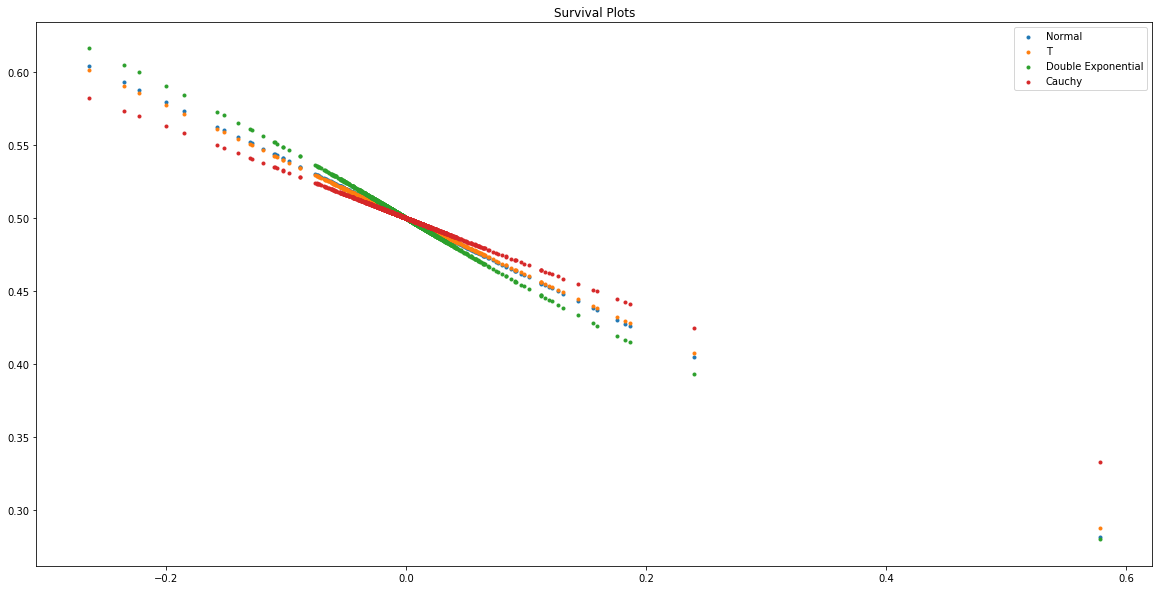

In [107]:
survivalPlots(a['C'])

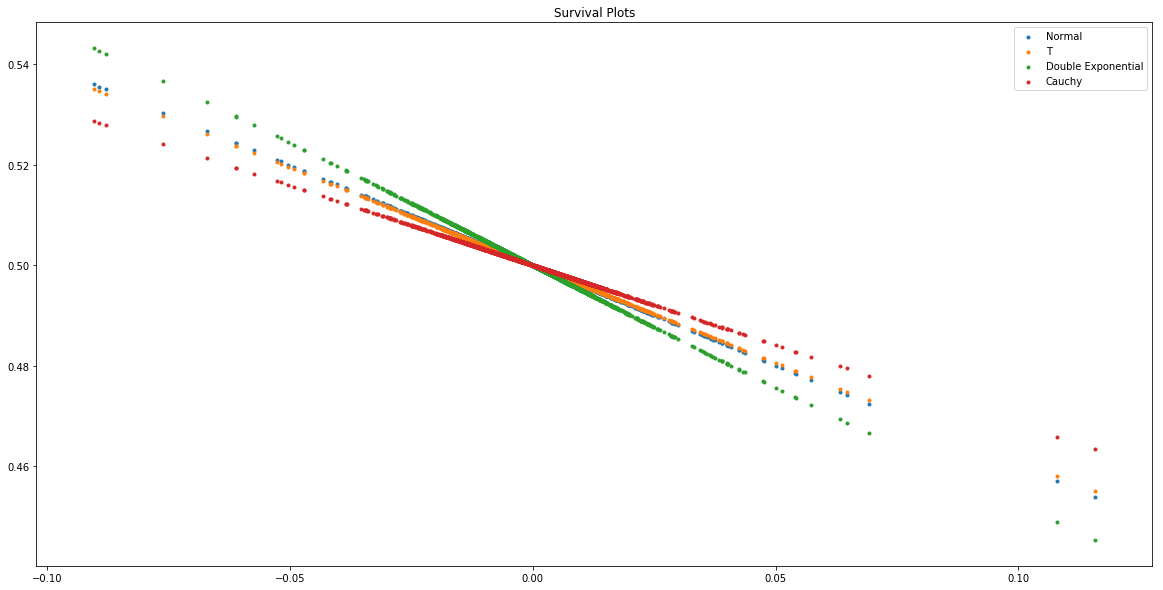

In [108]:
survivalPlots(a['SP'])